In [1]:
import numpy as np
import matplotlib.pyplot as plt

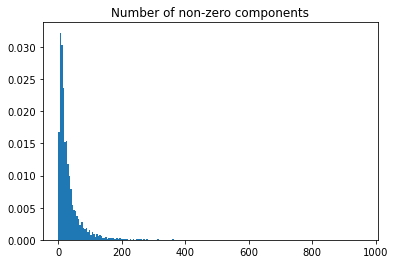

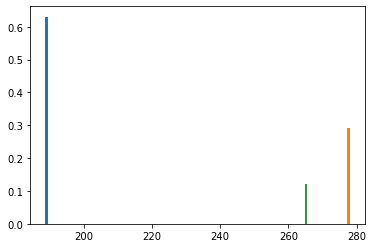

In [2]:
"""Generate number of nonzero features"""

def generate_num_nonzero(num_samples, lognorm_mean=3, lognorm_sigm=1):
    # Select number of nonzero terms in spectroscopy sample
    return np.random.lognormal(lognorm_mean, lognorm_sigm, num_samples).astype(int)

s = generate_num_nonzero(10000)
count, bins, ignored = plt.hist(s, 200, density=True, align='mid')
plt.title("Number of non-zero components")
plt.show()

"""Generate Mass Samples"""

def generate_mass_samples(num_nonzero, num_samples,
                          low=0, high=300, mass_std=0.001,
                          intensity_spread_factor=1.0, intensity_std=0.01):
    # Generate the location of the num_nonzero components
    #intensity_locs = np.random.dirichlet(np.ones(num_nonzero)*float(intensity_spread_factor))
    counts = np.random.uniform(0, 1, num_nonzero)
    intensity_locs = counts / counts.sum()
    
    #print("intensity means:", intensity_locs)
    samples = []
    for i in range(num_nonzero):
        loc = np.random.uniform(low, high)
        mass_samples = np.random.normal(loc, mass_std, num_samples)
        intensity_samples = np.random.normal(intensity_locs[i], intensity_std, num_samples)
        samples.append(np.column_stack((mass_samples, intensity_samples)))
    samples = np.array(samples)
    #return np.hstack(samples)
    samples[samples < 0] = 0
    return samples

samples = generate_mass_samples(3, 4)

for sample in samples:
    mass, intensity = sample[:,0], sample[:,1]
    plt.bar(mass, intensity)
plt.show()

In [3]:
# Random number of samples from 0-300
bounds = (0,300)
n_samples_per_compound = 10

In [4]:
def generate_sample_group(num_samples, lognorm_mean=3, lognorm_sigm=1,
                         low=0, high=300, mass_std=0.001,
                         intensity_spread_factor=1.0, intensity_std=0.01):
    num_nonzero = generate_num_nonzero(1, lognorm_mean=3, lognorm_sigm=1)[0]
    samples = generate_mass_samples(num_nonzero, num_samples,
                              low=low, high=high, mass_std=mass_std,
                              intensity_spread_factor=intensity_spread_factor, intensity_std=intensity_std)
    return samples

def visualize_samples(samples):
    for sample in samples:
        mass, intensity = sample[:,0], sample[:,1]
        plt.bar(mass, intensity)
    plt.show()


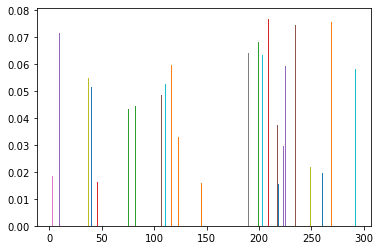

In [5]:
samples = generate_sample_group(10)
visualize_samples(samples)

In [15]:
def generate_all_samples(ngroups=100, nsamples_in_group=10, **kwargs):
    """Generates samples for multiple test groups.
    
    Returns
    -------
    X : `ngroup` size list of arrays: (nsamples_in_group, random_num_nonzero, 2)
    y : `ngroup`*`nsamples_in_group` size list of strings
    """
    X = []
    y = []
    for group_i in range(ngroups):
        samples = generate_sample_group(nsamples_in_group, **kwargs)
        n_samples, _, _ = samples.shape
        reshape_samples = np.reshape(samples, (nsamples_in_group, n_samples, 2))
        #visualize_samples(samples)
        print(reshape_samples.shape)
        X.append(reshape_samples)
        y.extend([f"group_{group_i}"]*nsamples_in_group)
    return X, y

X, y = generate_all_samples()
len(X), len(y)

(10, 17, 2)
(10, 194, 2)
(10, 7, 2)
(10, 35, 2)
(10, 14, 2)
(10, 7, 2)
(10, 8, 2)
(10, 23, 2)
(10, 5, 2)
(10, 48, 2)
(10, 19, 2)
(10, 31, 2)
(10, 65, 2)
(10, 22, 2)
(10, 6, 2)
(10, 62, 2)
(10, 21, 2)
(10, 23, 2)
(10, 12, 2)
(10, 6, 2)
(10, 36, 2)
(10, 10, 2)
(10, 32, 2)
(10, 46, 2)
(10, 83, 2)
(10, 31, 2)
(10, 18, 2)
(10, 32, 2)
(10, 13, 2)
(10, 33, 2)
(10, 5, 2)
(10, 47, 2)
(10, 4, 2)
(10, 74, 2)
(10, 208, 2)
(10, 34, 2)
(10, 58, 2)
(10, 44, 2)
(10, 23, 2)
(10, 28, 2)
(10, 6, 2)
(10, 10, 2)
(10, 50, 2)
(10, 2, 2)
(10, 1, 2)
(10, 26, 2)
(10, 21, 2)
(10, 27, 2)
(10, 6, 2)
(10, 5, 2)
(10, 78, 2)
(10, 11, 2)
(10, 14, 2)
(10, 8, 2)
(10, 28, 2)
(10, 7, 2)
(10, 3, 2)
(10, 5, 2)
(10, 17, 2)
(10, 18, 2)
(10, 77, 2)
(10, 9, 2)
(10, 9, 2)
(10, 144, 2)
(10, 9, 2)
(10, 12, 2)
(10, 35, 2)
(10, 69, 2)
(10, 5, 2)
(10, 22, 2)
(10, 2, 2)
(10, 13, 2)
(10, 6, 2)
(10, 21, 2)
(10, 3, 2)
(10, 33, 2)
(10, 15, 2)
(10, 18, 2)
(10, 1, 2)
(10, 40, 2)
(10, 28, 2)
(10, 14, 2)
(10, 70, 2)
(10, 1, 2)
(10, 11, 2)
(10

(100, 1000)

### Concern: This procedure can generate negative intensities since it samples a gaussian on the intensity location. For now, we make the negative value zero.